In [30]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
from nltk.corpus import stopwords
import nltk
#nltk.download("stopwords")
#nltk_stopwords = set(stopwords.words("turkish"))

def clean_text(text):
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"[^a-zA-ZçÇğĞıİöÖşŞüÜ ]", "", text)
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.replace("i̇", "i")
    #text = " ".join([word for word in text.split() if word not in nltk_stopwords])
    return text


In [32]:
main_folder = r"C:\\Users\\YUCE037\\Downloads\\AAydintasbas"
texts = []
labels = []

for author_folder in os.listdir(main_folder):
    author_path = os.path.join(main_folder, author_folder)
    if os.path.isdir(author_path):
        for txt_file in os.listdir(author_path):
            file_path = os.path.join(author_path, txt_file)
            if file_path.endswith(".txt"):
                with open(file_path, "r", encoding="utf-8") as f:
                    raw_text = f.read()
                    cleaned = clean_text(raw_text)
                    texts.append(cleaned)
                    labels.append(author_folder)

In [33]:
le = LabelEncoder()
y_encoded = le.fit_transform(labels)
X_train_texts, X_test_texts, y_train, y_test = train_test_split(texts, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [34]:
vectorizer_2gram = TfidfVectorizer(ngram_range=(2, 2), max_features=10000, min_df=2)
X_train_2gram = vectorizer_2gram.fit_transform(X_train_texts)
X_test_2gram = vectorizer_2gram.transform(X_test_texts)

In [35]:
vectorizer_3gram = TfidfVectorizer(ngram_range=(3, 3), max_features=10000, min_df=2)
X_train_3gram = vectorizer_3gram.fit_transform(X_train_texts)
X_test_3gram = vectorizer_3gram.transform(X_test_texts)

In [ ]:
results = []

def print_result(model_name, feature_type, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average="macro")
    rec = recall_score(y_true, y_pred, average="macro")
    f1 = f1_score(y_true, y_pred, average="macro")
    results.append({"model": model_name, "feature": feature_type, "accuracy": acc, "precision": prec, "recall": rec, "f1": f1})
    print(f"\n {model_name} | Feature: {feature_type}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}\n")
    print(classification_report(y_true, y_pred, target_names=le.classes_))

In [37]:
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X_train_2gram, y_train)
print_result("SVM", "2-gram", y_test, svm.predict(X_test_2gram))


📌 SVM | Feature: 2-gram
Accuracy:  0.6696
Precision: 0.7055
Recall:    0.6696
F1-score:  0.6712

              precision    recall  f1-score   support

      AAltan       1.00      0.88      0.93         8
AAydintasbas       0.86      0.75      0.80         8
      AHakan       0.78      0.88      0.82         8
 ATuranAlkan       0.50      0.50      0.50         8
    AYArslan       1.00      0.88      0.93         8
     BCoskun       0.38      0.38      0.38         8
     CCandar       0.75      0.38      0.50         8
    COzdemir       0.75      0.75      0.75         8
  DCundioglu       0.89      1.00      0.94         8
  DUAribogan       0.78      0.88      0.82         8
      EArdic       0.50      0.50      0.50         8
      ECakir       0.50      0.50      0.50         8
    GGokturk       0.36      0.50      0.42         8
   HBabaoglu       0.57      0.50      0.53         8
      HCemal       0.86      0.75      0.80         8
       HUluc       0.47      0.88    

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_2gram, y_train)
print_result("Random Forest", "2-gram", y_test, rf.predict(X_test_2gram))


📌 Random Forest | Feature: 2-gram
Accuracy:  0.5089
Precision: 0.5843
Recall:    0.5089
F1-score:  0.5136

              precision    recall  f1-score   support

      AAltan       0.57      0.50      0.53         8
AAydintasbas       0.83      0.62      0.71         8
      AHakan       0.50      0.50      0.50         8
 ATuranAlkan       0.40      0.25      0.31         8
    AYArslan       0.88      0.88      0.88         8
     BCoskun       0.10      0.12      0.11         8
     CCandar       0.83      0.62      0.71         8
    COzdemir       0.57      0.50      0.53         8
  DCundioglu       0.89      1.00      0.94         8
  DUAribogan       0.75      0.75      0.75         8
      EArdic       0.33      0.12      0.18         8
      ECakir       0.29      0.25      0.27         8
    GGokturk       1.00      0.25      0.40         8
   HBabaoglu       0.44      0.50      0.47         8
      HCemal       0.33      0.25      0.29         8
       HUluc       0.50    

In [39]:

from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb.fit(X_train_2gram, y_train)
print_result("XGBoost", "2-gram", y_test, xgb.predict(X_test_2gram))

C:\Users\YUCE037\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:21:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📌 XGBoost | Feature: 2-gram
Accuracy:  0.4062
Precision: 0.4508
Recall:    0.4062
F1-score:  0.4054

              precision    recall  f1-score   support

      AAltan       0.50      0.25      0.33         8
AAydintasbas       0.33      0.25      0.29         8
      AHakan       0.44      0.50      0.47         8
 ATuranAlkan       0.50      0.75      0.60         8
    AYArslan       0.67      0.75      0.71         8
     BCoskun       0.12      0.38      0.19         8
     CCandar       0.75      0.38      0.50         8
    COzdemir       0.50      0.38      0.43         8
  DCundioglu       1.00      0.75      0.86         8
  DUAribogan       0.80      0.50      0.62         8
      EArdic       0.14      0.12      0.13         8
      ECakir       0.33      0.38      0.35         8
    GGokturk       0.67      0.25      0.36         8
   HBabaoglu       0.20      0.25      0.22         8
      HCemal       0.00      0.00      0.00         8
       HUluc       0.43      0.38

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_2gram, y_train)
print_result("Naive Bayes", "2-gram", y_test, nb.predict(X_test_2gram))


📌 Naive Bayes | Feature: 2-gram
Accuracy:  0.5625
Precision: 0.5987
Recall:    0.5625
F1-score:  0.5313

              precision    recall  f1-score   support

      AAltan       0.64      0.88      0.74         8
AAydintasbas       0.55      0.75      0.63         8
      AHakan       0.64      0.88      0.74         8
 ATuranAlkan       0.29      0.25      0.27         8
    AYArslan       0.67      1.00      0.80         8
     BCoskun       1.00      0.12      0.22         8
     CCandar       0.67      0.50      0.57         8
    COzdemir       0.64      0.88      0.74         8
  DCundioglu       0.70      0.88      0.78         8
  DUAribogan       0.78      0.88      0.82         8
      EArdic       0.40      0.25      0.31         8
      ECakir       0.67      0.25      0.36         8
    GGokturk       0.43      0.38      0.40         8
   HBabaoglu       0.50      0.25      0.33         8
      HCemal       0.67      0.50      0.57         8
       HUluc       0.43      

In [41]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp.fit(X_train_2gram, y_train)
print_result("MLP", "2-gram", y_test, mlp.predict(X_test_2gram))


📌 MLP | Feature: 2-gram
Accuracy:  0.6295
Precision: 0.6545
Recall:    0.6295
F1-score:  0.6179

              precision    recall  f1-score   support

      AAltan       0.54      0.88      0.67         8
AAydintasbas       0.75      0.75      0.75         8
      AHakan       0.67      0.75      0.71         8
 ATuranAlkan       1.00      0.25      0.40         8
    AYArslan       0.80      1.00      0.89         8
     BCoskun       0.50      0.25      0.33         8
     CCandar       0.80      0.50      0.62         8
    COzdemir       0.78      0.88      0.82         8
  DCundioglu       0.88      0.88      0.88         8
  DUAribogan       0.70      0.88      0.78         8
      EArdic       0.45      0.62      0.53         8
      ECakir       0.67      0.50      0.57         8
    GGokturk       1.00      0.38      0.55         8
   HBabaoglu       0.44      0.50      0.47         8
      HCemal       0.45      0.62      0.53         8
       HUluc       0.60      0.75    

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_2gram, y_train)
print_result("Decision Tree", "2-gram", y_test, tree.predict(X_test_2gram))



📌 Decision Tree | Feature: 2-gram
Accuracy:  0.2455
Precision: 0.2419
Recall:    0.2455
F1-score:  0.2308

              precision    recall  f1-score   support

      AAltan       0.00      0.00      0.00         8
AAydintasbas       0.67      0.25      0.36         8
      AHakan       0.40      0.50      0.44         8
 ATuranAlkan       0.22      0.25      0.24         8
    AYArslan       0.43      0.38      0.40         8
     BCoskun       0.00      0.00      0.00         8
     CCandar       0.50      0.38      0.43         8
    COzdemir       0.00      0.00      0.00         8
  DCundioglu       0.75      0.75      0.75         8
  DUAribogan       0.25      0.12      0.17         8
      EArdic       0.20      0.12      0.15         8
      ECakir       0.00      0.00      0.00         8
    GGokturk       0.00      0.00      0.00         8
   HBabaoglu       0.22      0.25      0.24         8
      HCemal       0.20      0.12      0.15         8
       HUluc       0.12    

In [43]:
svm.fit(X_train_3gram, y_train)
print_result("SVM", "3-gram", y_test, svm.predict(X_test_3gram))


📌 SVM | Feature: 3-gram
Accuracy:  0.3482
Precision: 0.3785
Recall:    0.3482
F1-score:  0.3519

              precision    recall  f1-score   support

      AAltan       0.43      0.38      0.40         8
AAydintasbas       0.71      0.62      0.67         8
      AHakan       0.38      0.38      0.38         8
 ATuranAlkan       0.00      0.00      0.00         8
    AYArslan       0.78      0.88      0.82         8
     BCoskun       0.22      0.50      0.31         8
     CCandar       0.25      0.12      0.17         8
    COzdemir       0.50      0.38      0.43         8
  DCundioglu       0.83      0.62      0.71         8
  DUAribogan       0.67      0.75      0.71         8
      EArdic       0.50      0.25      0.33         8
      ECakir       0.11      0.12      0.12         8
    GGokturk       0.25      0.12      0.17         8
   HBabaoglu       0.17      0.38      0.23         8
      HCemal       0.40      0.25      0.31         8
       HUluc       0.25      0.25    

In [44]:
rf.fit(X_train_3gram, y_train)
print_result("Random Forest", "3-gram", y_test, rf.predict(X_test_3gram))


📌 Random Forest | Feature: 3-gram
Accuracy:  0.1607
Precision: 0.3297
Recall:    0.1607
F1-score:  0.1722

              precision    recall  f1-score   support

      AAltan       1.00      0.12      0.22         8
AAydintasbas       0.50      0.12      0.20         8
      AHakan       1.00      0.12      0.22         8
 ATuranAlkan       0.00      0.00      0.00         8
    AYArslan       1.00      0.50      0.67         8
     BCoskun       0.25      0.12      0.17         8
     CCandar       0.00      0.00      0.00         8
    COzdemir       0.33      0.25      0.29         8
  DCundioglu       0.50      0.38      0.43         8
  DUAribogan       0.50      0.25      0.33         8
      EArdic       0.00      0.00      0.00         8
      ECakir       0.00      0.00      0.00         8
    GGokturk       0.00      0.00      0.00         8
   HBabaoglu       0.20      0.12      0.15         8
      HCemal       0.00      0.00      0.00         8
       HUluc       0.33    

C:\Users\YUCE037\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YUCE037\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YUCE037\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [45]:
xgb.fit(X_train_3gram, y_train)
print_result("XGBoost", "3-gram", y_test, xgb.predict(X_test_3gram))

C:\Users\YUCE037\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:22:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📌 XGBoost | Feature: 3-gram
Accuracy:  0.1295
Precision: 0.1878
Recall:    0.1295
F1-score:  0.1205

              precision    recall  f1-score   support

      AAltan       0.17      0.12      0.14         8
AAydintasbas       0.00      0.00      0.00         8
      AHakan       0.33      0.12      0.18         8
 ATuranAlkan       0.00      0.00      0.00         8
    AYArslan       0.43      0.38      0.40         8
     BCoskun       0.00      0.00      0.00         8
     CCandar       0.00      0.00      0.00         8
    COzdemir       0.40      0.25      0.31         8
  DCundioglu       0.33      0.25      0.29         8
  DUAribogan       0.25      0.12      0.17         8
      EArdic       0.00      0.00      0.00         8
      ECakir       0.00      0.00      0.00         8
    GGokturk       0.33      0.12      0.18         8
   HBabaoglu       0.00      0.00      0.00         8
      HCemal       0.20      0.12      0.15         8
       HUluc       0.00      0.00

In [46]:
nb.fit(X_train_3gram, y_train)
print_result("Naive Bayes", "3-gram", y_test, nb.predict(X_test_3gram))


📌 Naive Bayes | Feature: 3-gram
Accuracy:  0.3393
Precision: 0.3534
Recall:    0.3393
F1-score:  0.3248

              precision    recall  f1-score   support

      AAltan       0.13      0.25      0.17         8
AAydintasbas       0.42      0.62      0.50         8
      AHakan       0.30      0.38      0.33         8
 ATuranAlkan       0.00      0.00      0.00         8
    AYArslan       0.73      1.00      0.84         8
     BCoskun       0.25      0.12      0.17         8
     CCandar       0.43      0.38      0.40         8
    COzdemir       0.27      0.38      0.32         8
  DCundioglu       0.55      0.75      0.63         8
  DUAribogan       0.75      0.75      0.75         8
      EArdic       1.00      0.25      0.40         8
      ECakir       0.20      0.12      0.15         8
    GGokturk       0.20      0.12      0.15         8
   HBabaoglu       0.15      0.25      0.19         8
      HCemal       0.33      0.25      0.29         8
       HUluc       0.20      

In [47]:
mlp.fit(X_train_3gram, y_train)
print_result("MLP", "3-gram", y_test, mlp.predict(X_test_3gram))


📌 MLP | Feature: 3-gram
Accuracy:  0.2321
Precision: 0.5032
Recall:    0.2321
F1-score:  0.2850

              precision    recall  f1-score   support

      AAltan       0.50      0.12      0.20         8
AAydintasbas       1.00      0.25      0.40         8
      AHakan       0.67      0.25      0.36         8
 ATuranAlkan       0.00      0.00      0.00         8
    AYArslan       1.00      0.62      0.77         8
     BCoskun       0.06      0.25      0.10         8
     CCandar       1.00      0.38      0.55         8
    COzdemir       0.67      0.25      0.36         8
  DCundioglu       1.00      0.62      0.77         8
  DUAribogan       0.67      0.25      0.36         8
      EArdic       0.50      0.12      0.20         8
      ECakir       0.00      0.00      0.00         8
    GGokturk       0.00      0.00      0.00         8
   HBabaoglu       0.50      0.25      0.33         8
      HCemal       0.50      0.12      0.20         8
       HUluc       0.25      0.12    

C:\Users\YUCE037\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YUCE037\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YUCE037\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [48]:
tree.fit(X_train_3gram, y_train)
print_result("Decision Tree", "3-gram", y_test, tree.predict(X_test_3gram))


📌 Decision Tree | Feature: 3-gram
Accuracy:  0.1786
Precision: 0.2555
Recall:    0.1786
F1-score:  0.1772

              precision    recall  f1-score   support

      AAltan       0.50      0.25      0.33         8
AAydintasbas       1.00      0.12      0.22         8
      AHakan       1.00      0.25      0.40         8
 ATuranAlkan       0.09      0.12      0.11         8
    AYArslan       0.75      0.38      0.50         8
     BCoskun       0.00      0.00      0.00         8
     CCandar       0.00      0.00      0.00         8
    COzdemir       0.18      0.25      0.21         8
  DCundioglu       0.67      0.50      0.57         8
  DUAribogan       0.33      0.38      0.35         8
      EArdic       0.00      0.00      0.00         8
      ECakir       0.00      0.00      0.00         8
    GGokturk       0.50      0.25      0.33         8
   HBabaoglu       0.00      0.00      0.00         8
      HCemal       0.00      0.00      0.00         8
       HUluc       0.14    

C:\Users\YUCE037\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YUCE037\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YUCE037\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

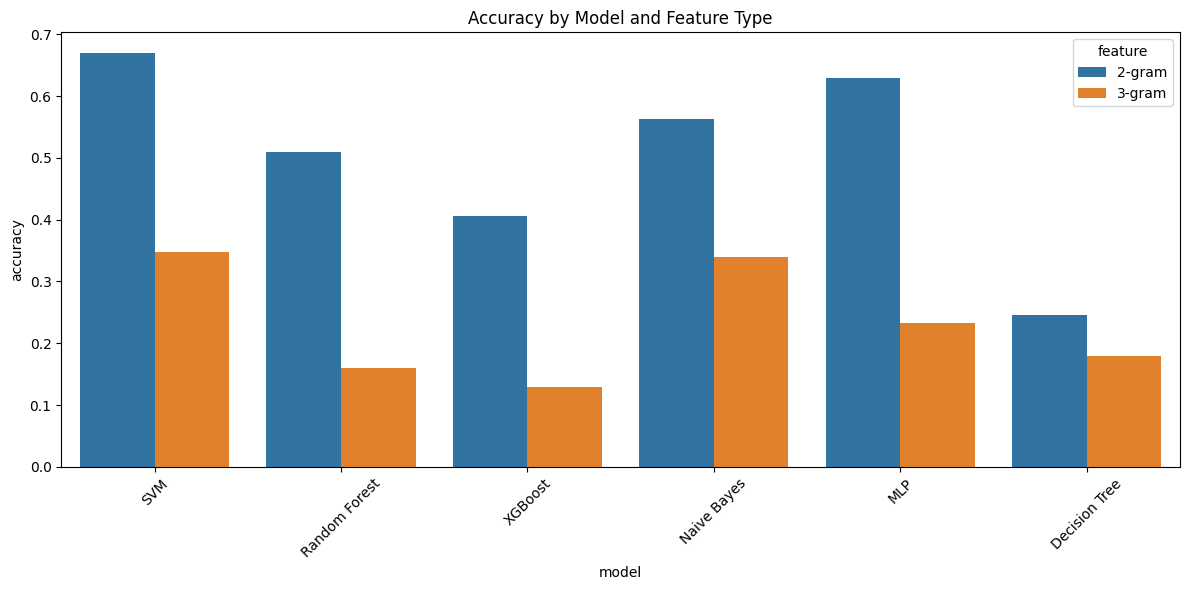

In [49]:
results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="model", y="accuracy", hue="feature")
plt.title("Accuracy by Model and Feature Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


MAX FEATURES ARTTIRILDI SONUÇ DAHA İYİ ŞU AN AYNI ZAMANDA STOP WORDSLER KALDIRILDI 